## Import libraries

- I'll import `datetime` to handle years.
- I'll use `numpy` for working with arrays.
- `pandas` will be employed to read dataset files.
- For plotting, I'll utilize both `matplotlib` and `seaborn`.
- `



In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Read dataset

`Read the dataset to set the information about it` 

In [14]:
dataset = pd.read_csv("./car_data.csv")
dataset.head(5)

Make    Model                          Version      Price  Make_Year  \
0       Honda  Insight                              NaN  7400000.0       2019   
1  Mitsubishi   Minica                     Black Minica  1065000.0       2019   
2        Audi       A6  1.8 TFSI Business Class Edition  9300000.0       2015   
3      Toyota     Aqua                                G  2375000.0       2014   
4       Honda     City                       1.3 i-VTEC  2600000.0       2017   

     CC  Assembly  Mileage Registered City Transmission  
0  1500  Imported     2000   Un-Registered    Automatic  
1   660  Imported    68000          Lahore    Automatic  
2  1800     Local    70000          Lahore    Automatic  
3  1500  Imported    99900       Islamabad    Automatic  
4  1300     Local    55000       Islamabad       Manual

# Train Test Split

In [15]:
print(dataset.columns)
dataset = dataset.dropna()
dataset = dataset[dataset['Price'] != 'Call for price']
X_dataset = dataset.drop(columns=['Price'])
Y_dataset = dataset['Price']
# Random State is not used for splitting the dataset, as because it is not a classification
# MSE can be reduced using this 
X_train, X_test, y_train, y_test = train_test_split(X_dataset , Y_dataset,
                                                    test_size = 0.3) 
                                                    # random_state = 42)

Index(['Make', 'Model', 'Version', 'Price', 'Make_Year', 'CC', 'Assembly',
       'Mileage', 'Registered City', 'Transmission'],
      dtype='object')


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50858 entries, 18644 to 74936
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Make             50858 non-null  object
 1   Model            50858 non-null  object
 2   Version          50858 non-null  object
 3   Make_Year        50858 non-null  int64 
 4   CC               50858 non-null  int64 
 5   Assembly         50858 non-null  object
 6   Mileage          50858 non-null  int64 
 7   Registered City  50858 non-null  object
 8   Transmission     50858 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.9+ MB


# Exploratory Data Analysis
- We will delve into the diverse columns, extracting insights to gauge the utility of each.
- Our exploration aims to draw valuable information from the dataset.
- Additionally, we plan to refine the test data based on patterns observed in the training data.

In [17]:
print(X_train.iloc[:, :])  # Just for the preview of training data

         Make    Model                                    Version  Make_Year  \
18644  Toyota     Aqua                                  Crossover       2018   
29427  Toyota  Starlet                                        1.0       1993   
67584  Toyota  Corolla                     GLi Automatic 1.3 VVTi       2015   
53256  Suzuki    Bolan                                   VX (CNG)       2003   
15328  Toyota     Land  Cruiser AX G 60th Black Leather Selection       2011   
...       ...      ...                                        ...        ...   
31751  Toyota  Corolla                     Altis Grande CVT-i 1.8       2016   
6560    Honda     City                                 1.3 i-VTEC       2009   
31603   Honda    Civic                                    VTi 1.6       1997   
63492  Suzuki   Mehran                                   VX (CNG)       2011   
74936  Suzuki   Mehran                                  VXR (CNG)       2005   

         CC  Assembly  Mileage Register

In [18]:

print(X_train.shape)
print(X_test.shape)
print(dataset.shape)

(50858, 9)
(21797, 9)
(72655, 10)


### Name

- Let's explore the various car model in the dataset.

In [19]:
X_train["Model"].value_counts()

Model
Corolla    10435
Civic       4731
Mehran      4587
Cultus      3474
City        3264
           ...  
X7             1
Triton         1
S40            1
Urban          1
500            1
Name: count, Length: 266, dtype: int64

# Data Plotting to see the distribution

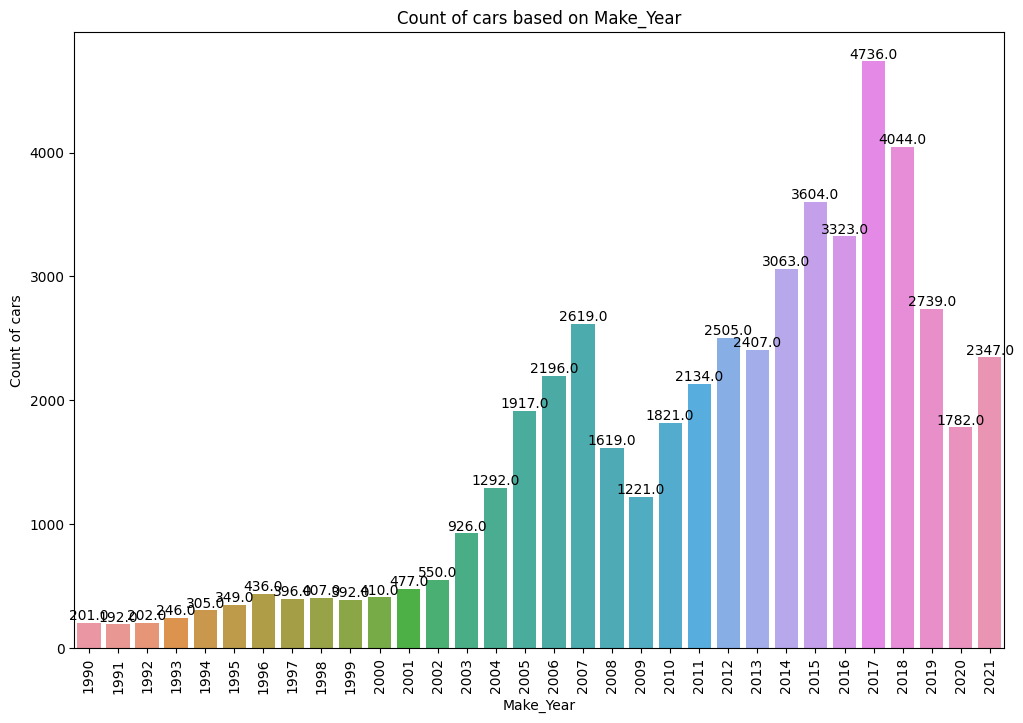

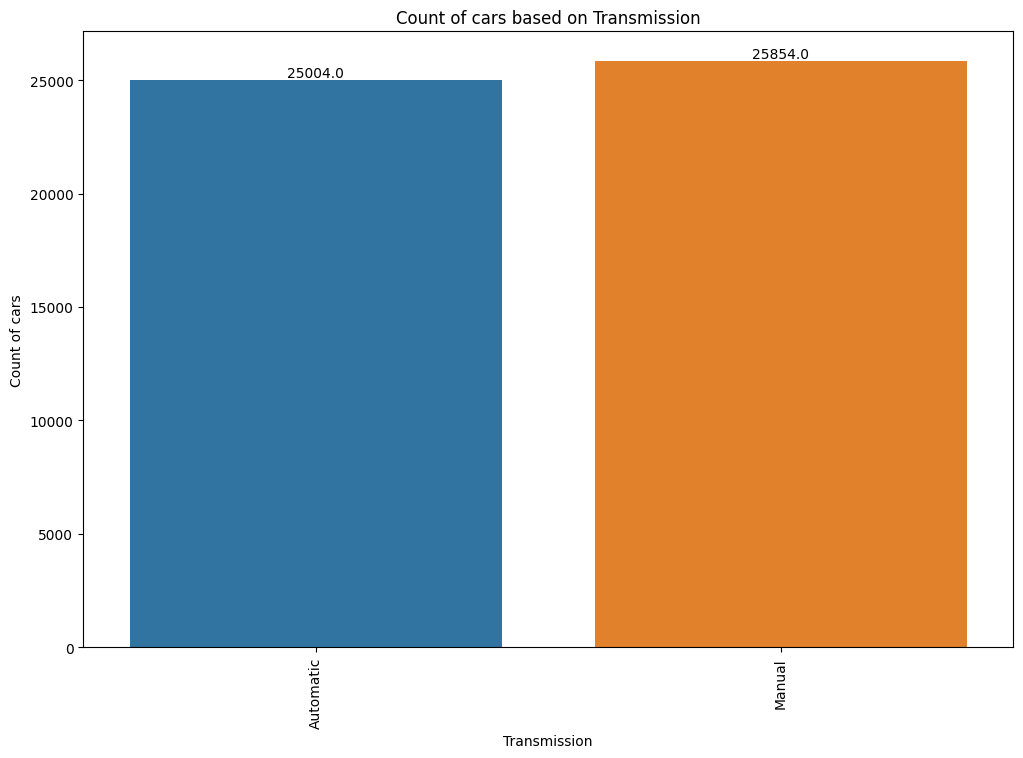

In [20]:
def plot_counts(X_train, col_name):
    plt.figure(figsize = (12, 8))
    plot = sns.countplot(x = col_name, data = X_train)
    plt.xticks(rotation = 90)
    for p in plot.patches:
        plot.annotate(p.get_height(), 
                            (p.get_x() + p.get_width() / 2.0, 
                             p.get_height()), 
                            ha = 'center', 
                            va = 'center', 
                            xytext = (0, 5),
                            textcoords = 'offset points')

    plt.title(f"Count of cars based on {col_name}")
    plt.xlabel(col_name)
    plt.ylabel("Count of cars")

plot_counts(X_train, "Make_Year")
plot_counts(X_train, "Transmission")

### Year

- Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.
- We have to calculate the how old the car

In [21]:
curr_time = datetime.datetime.now()
X_train['Make_Year'] = X_train['Make_Year'].apply(lambda x : curr_time.year - x)
X_test['Make_Year'] = X_test['Make_Year'].apply(lambda x : curr_time.year - x)

## Mileage

- This column defines the mileage of the car.
- We need to extract the numerical value out of each string and save it.

Let's check for missing values.

In [22]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
0


- There is no missing value in each.
- Just to be on the safr side, replace any missing value with the mean

In [23]:
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

## Data Processing

- Now that we have worked with the training data
- let's create dummy columns for categorical columns before we begin training.

In [24]:
print(X_train.shape)
print(X_train)

(50858, 9)
         Make    Model                                    Version  Make_Year  \
18644  Toyota     Aqua                                  Crossover          5   
29427  Toyota  Starlet                                        1.0         30   
67584  Toyota  Corolla                     GLi Automatic 1.3 VVTi          8   
53256  Suzuki    Bolan                                   VX (CNG)         20   
15328  Toyota     Land  Cruiser AX G 60th Black Leather Selection         12   
...       ...      ...                                        ...        ...   
31751  Toyota  Corolla                     Altis Grande CVT-i 1.8          7   
6560    Honda     City                                 1.3 i-VTEC         14   
31603   Honda    Civic                                    VTi 1.6         26   
63492  Suzuki   Mehran                                   VX (CNG)         12   
74936  Suzuki   Mehran                                  VXR (CNG)         18   

         CC  Assembly  Milea

In [25]:
X_train = pd.get_dummies(X_train,
                         columns = ["Make", "Model", "Version", "Assembly" , 'Registered City' , 'Transmission' ],
                         drop_first = True)

In [26]:
print(X_train.shape)
print(X_train)

(50858, 1722)
       Make_Year    CC  Mileage  Make_BMW  Make_Cadillac  Make_Changan  \
18644          5  1500    25000     False          False         False   
29427         30  1000   150000     False          False         False   
67584          8  1300    66000     False          False         False   
53256         20   800    63000     False          False         False   
15328         12  4600   120000     False          False         False   
...          ...   ...      ...       ...            ...           ...   
31751          7  1800    65000     False          False         False   
6560          14  1300   160000     False          False         False   
31603         26  1600    64500     False          False         False   
63492         12   800    84000     False          False         False   
74936         18   800   150000     False          False         False   

       Make_Chery  Make_Chevrolet  Make_Chrysler  Make_DFSK  ...  \
18644       False           F

In [13]:
X_test = pd.get_dummies(X_test,
                         columns = ["Make", "Model", "Version", "Assembly" , 'Registered City' , 'Transmission' ],
                         drop_first = True)

It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [14]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

C:\Users\Pc\AppData\Local\Temp\ipykernel_22652\2961525409.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\Pc\AppData\Local\Temp\ipykernel_22652\2961525409.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\Pc\AppData\Local\Temp\ipykernel_22652\2961525409.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

Finally, as the last step of data processing, I'll scale the data.

In [15]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
standardScaler.fit(y_train)
y_train = standardScaler.transform(y_train)
y_test = standardScaler.transform(y_test)

## Training and predicting

I'll create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions.

In [16]:
from sklearn.decomposition import PCA
print(X_train.shape)
print(X_test.shape)
num_components = min(X_train.shape[0], X_train.shape[1])  # Choose the number of components
pca = PCA(n_components=num_components)
x_train_pca = pca.fit_transform(X_train)
num_components = min(X_test.shape[0], X_test.shape[1])  # Choose the number of components
pca = PCA(n_components=num_components)
x_test_pca = pca.fit_transform(X_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(50858, 1713)
(21797, 1713)
(50858, 1713)
(21797, 1713)


In [17]:
from sklearn.neural_network import MLPRegressor
# from sklearn.model_selection import neural_network
# linearRegression = MLPRegressor()
linearRegression  = MLPRegressor(random_state=1, max_iter=10).fit(X_train, y_train.ravel())

# linearRegression = LinearRegression()
# linearRegression.fit(X_train, y_train.ravel())
y_pred = linearRegression.predict(X_test)
r2_score(y_test.ravel(), y_pred)
print("R2 Score: ", r2_score(y_test.ravel(), y_pred))
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test.ravel(), y_pred)

print(f'Mean Squared Error: {mse}')

c:\Users\Pc\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 Score:  0.855057273443841
Mean Squared Error: 0.13870359144597597


In [19]:
# rf = RandomForestRegressor()
rf = RandomForestRegressor()
# rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print("R2 Score: ", r2_score(y_test.ravel(), y_pred))


c:\Users\Pc\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.026743607117710223
R2 Score:  0.9720534177004536


In [20]:
from sklearn.linear_model import SGDRegressor
# from sklearn.model_selection import neural_network
# sgdRegression = MLPRegressor()
sgdRegression  = SGDRegressor(max_iter=1000, tol=1e-3).fit(X_train, y_train.ravel())

# sgdRegression = sgdRegression()
# sgdRegression.fit(X_train, y_train.ravel())
y_pred = sgdRegression.predict(X_test)
r2_score(y_test.ravel(), y_pred)
print("R2 Score: ", r2_score(y_test.ravel(), y_pred))
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test.ravel(), y_pred)

print(f'Mean Squared Error: {mse}')

R2 Score:  -3.1244571725016e+24
Mean Squared Error: 2.989963287169141e+24


(21797, 1713)
(21797, 1)


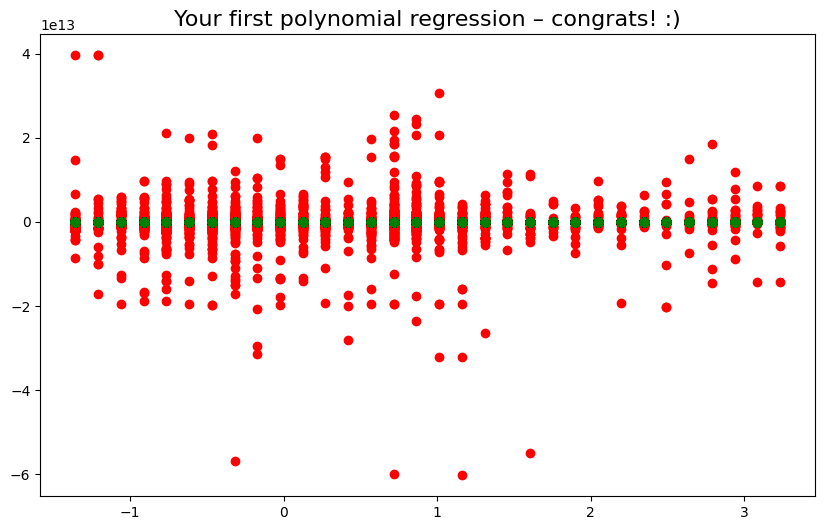

In [38]:
print(X_test.shape)
print(y_test.shape)
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(X_test[: , 0], y_pred, c="r")
plt.scatter(X_test[: , 0], y_test , c="g")
plt.show()

The **Random Forest** model performed the best with a R2 score of **0.88**.